In [1]:
import pandas as p
data = p.read_csv('N:\STUDY\SEM_8\Capstone\Fusion-Based Ensemble Learning Framework for Enhanced Diabetes Classification\Codes\Local HealthCare.csv')

In [2]:
data.head(5)

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1


In [3]:
print(data.isnull().sum())

No. of Pregnancy       0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64


In [4]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


In [5]:
from scipy import stats

# Compute Z-scores
z_scores = stats.zscore(data.select_dtypes(include=['number']))  # Only for numeric columns
outliers = (abs(z_scores) > 3)

# Print count of outliers
print("Number of Outliers per Column:\n", outliers.sum())


Number of Outliers per Column:
 No. of Pregnancy       9
Age                    2
BMI                    4
BP(Systolic)           2
BP(Diastolic)          5
Genetic                5
Insulin                2
Skin Thickness(mm)     1
Glucose Consumption    4
Outcome                0
dtype: int64


In [6]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


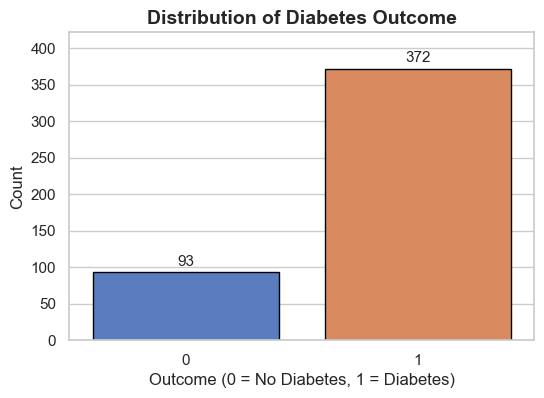

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

outcome_counts = data['Outcome'].value_counts().sort_index()

# Create bar plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, edgecolor='black')

for i, val in enumerate(outcome_counts.values):
    ax.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

# Customize plot
plt.title('Distribution of Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(0, outcome_counts.max() + 50)

# Save and show
plt.show()


In [8]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [12]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.83


Confusion matrix for ML Models


🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.84      0.96      0.90        27
    Diabetes       0.99      0.96      0.97       113

    accuracy                           0.96       140
   macro avg       0.91      0.96      0.93       140
weighted avg       0.96      0.96      0.96       140



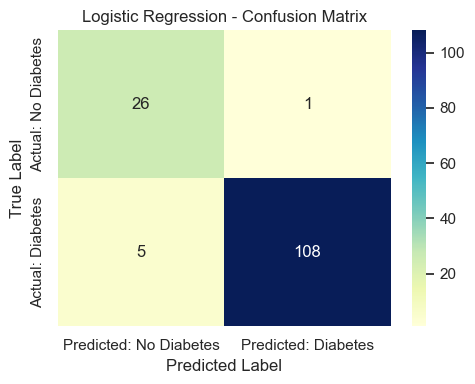


🔹 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.72      0.67      0.69        27
    Diabetes       0.92      0.94      0.93       113

    accuracy                           0.89       140
   macro avg       0.82      0.80      0.81       140
weighted avg       0.88      0.89      0.88       140



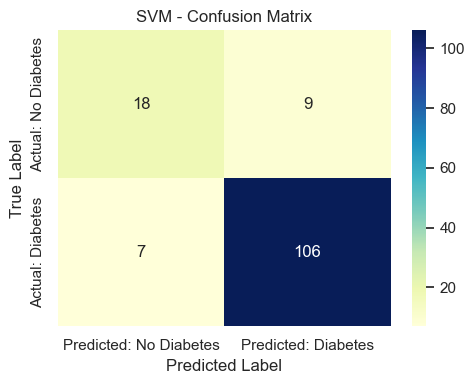


🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00        27
    Diabetes       1.00      1.00      1.00       113

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



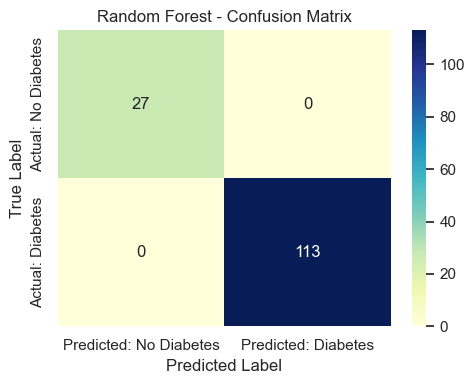

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', random_state=21),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

#  Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n🔹 {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Fix Logistic Regression Convergence
log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 1: Multiply probabilities for each class across models
final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

#  Step 2: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  # Class with max probability

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.9857


Confusion matrix for Proposed Method

Precision: 1.0000
Recall: 0.9823
F1 Score: 0.9911


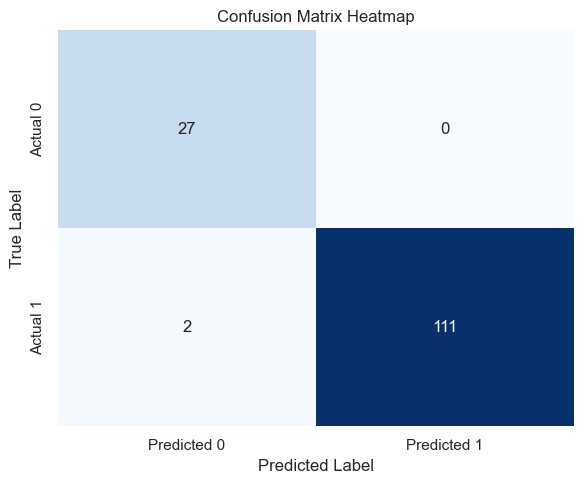

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_prediction)

#  Evaluation Metrics (for binary classification)
precision = precision_score(y_test, final_prediction)
recall = recall_score(y_test, final_prediction)
f1 = f1_score(y_test, final_prediction)

#  Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#  Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


5 Fold Cross Validation for Proposed Method

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🔹 Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🔹 Initialize lists to store accuracy scores
accuracies = []

# 🔹 Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 🔹 Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # 🔹 Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # 🔹 Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

# 🔹 Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 1.0000
Fold Accuracy: 0.9570
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 0.9785

Final 5-Fold Cross-Validation Accuracy: 0.9871


Confusion matrix  for 5 Fold Cross Validation


 Final 5-Fold Results (All Folds Combined):
Accuracy : 0.9871
Precision: 1.0000
Recall   : 0.9839
F1 Score : 0.9919
Confusion Matrix:
 [[ 93   0]
 [  6 366]]


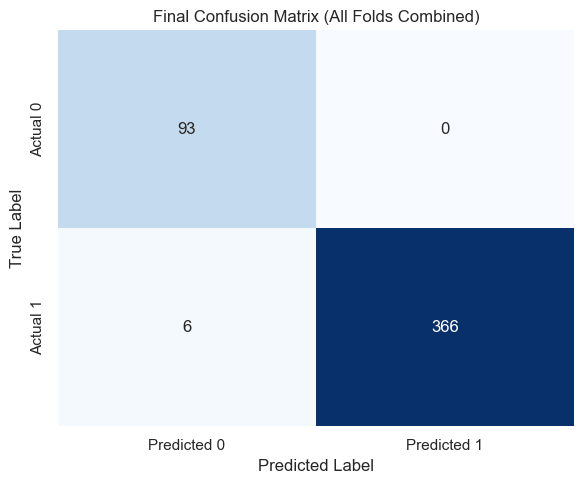

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
all_true = []
all_preds = []
fold_num = 1

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Training
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Probabilities
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Final prediction by multiplying probabilities
    final_prob = log_prob * svm_prob * rf_prob
    final_prediction = np.argmax(final_prob, axis=1)

    # Save fold metrics
    accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(accuracy)

    # Store predictions for final confusion matrix
    all_true.extend(y_test)
    all_preds.extend(final_prediction)

    fold_num += 1

# 🔹 Final Metrics
final_conf_matrix = confusion_matrix(all_true, all_preds)
final_precision = precision_score(all_true, all_preds)
final_recall = recall_score(all_true, all_preds)
final_f1 = f1_score(all_true, all_preds)
final_accuracy = np.mean(accuracies)

# 🔹 Print Final Results
print("\n Final 5-Fold Results (All Folds Combined):")
print(f"Accuracy : {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall   : {final_recall:.4f}")
print(f"F1 Score : {final_f1:.4f}")
print("Confusion Matrix:\n", final_conf_matrix)

# 🔹 Plot Final Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Final Confusion Matrix (All Folds Combined)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Using SMOTE()

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



#  Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#  Print Class Distribution Before and After SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())



Class Distribution Before SMOTE:
 Outcome
1    260
0     65
Name: count, dtype: int64

Class Distribution After SMOTE:
 Outcome
1    260
0    260
Name: count, dtype: int64


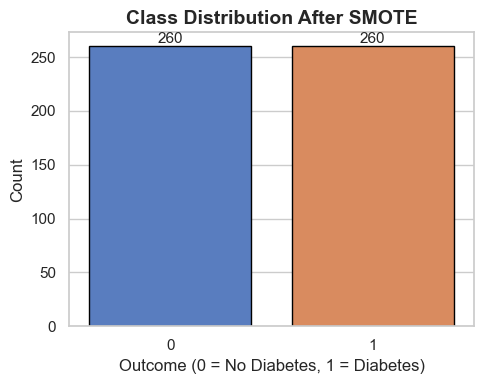

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="muted")
# Count after SMOTE
after_counts = pd.Series(y_train_resampled).value_counts().sort_index()


plt.figure(figsize=(5, 4))
sns.barplot(x=after_counts.index.astype(str), y=after_counts.values, edgecolor='black')

for i, val in enumerate(after_counts.values):
    plt.text(i, val + 3, str(val), ha='center', fontsize=11)

# Customize plot
plt.title("Class Distribution After SMOTE", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()

# Save and show
plt.savefig("after_smote_distribution.png", dpi=300)
plt.show()


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 🔹 Train models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy


Logistic Regression Accuracy: 0.9143
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
SVM Accuracy: 0.8714
K-Nearest Neighbors Accuracy: 0.7214


Confusion matrix for ML Models after SMOTE() applied


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.70      1.00      0.82        28
    Diabetes       1.00      0.89      0.94       112

    accuracy                           0.91       140
   macro avg       0.85      0.95      0.88       140
weighted avg       0.94      0.91      0.92       140



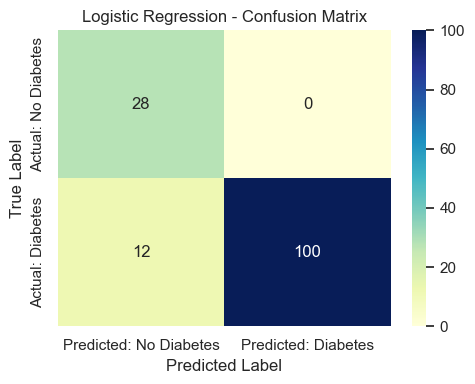


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.61      0.96      0.75        28
    Diabetes       0.99      0.85      0.91       112

    accuracy                           0.87       140
   macro avg       0.80      0.91      0.83       140
weighted avg       0.91      0.87      0.88       140



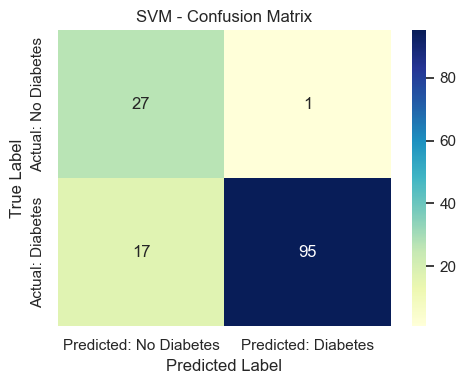


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00        28
    Diabetes       1.00      1.00      1.00       112

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



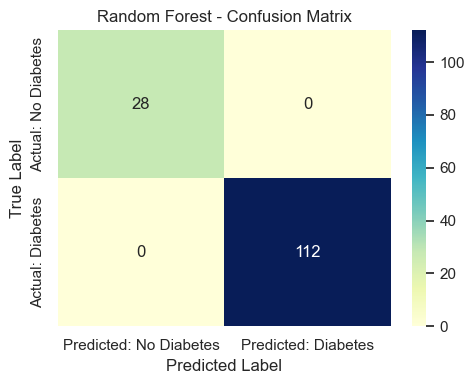

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', random_state=33),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

#  Evaluate each model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method after SMOTE() applied

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#  Train three ML models
log_reg = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Get probability scores for each class
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Multiply probabilities for each class (element-wise)
final_prob = log_prob * svm_prob * rf_prob

#  Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)

#  Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

#  Print results
print(f"Final Model Accuracy (SMOTE Applied): {final_accuracy:.4f}")


Final Model Accuracy (SMOTE Applied): 0.9571


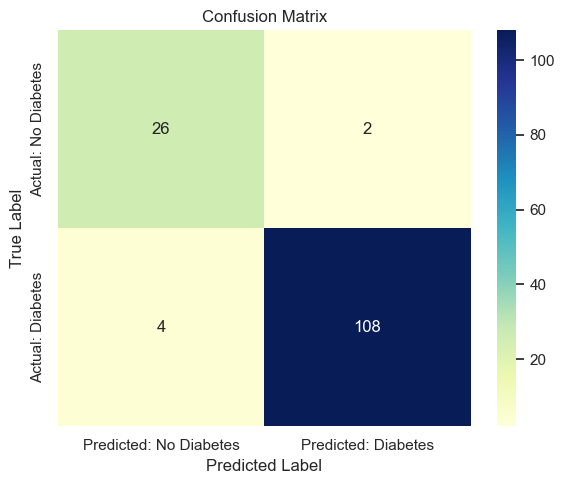

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_final = confusion_matrix(y_test, final_prediction)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
            yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


5 Fold Cross Validation for Proposed Method after SMOTE() applied

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

#  Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 1.0000
Fold Accuracy: 0.9570
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 0.9785

Final 5-Fold Cross-Validation Accuracy: 0.9871


 Confusion Matrix 5 Fold Cross Validation after SMOTE()

Fold Accuracy: 1.0000
Fold Accuracy: 0.9570
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 0.9785

Final 5-Fold Accuracy: 0.9871
Precision: 1.0000
Recall   : 0.9839
F1 Score : 0.9919
Confusion Matrix:
 [[ 93   0]
 [  6 366]]


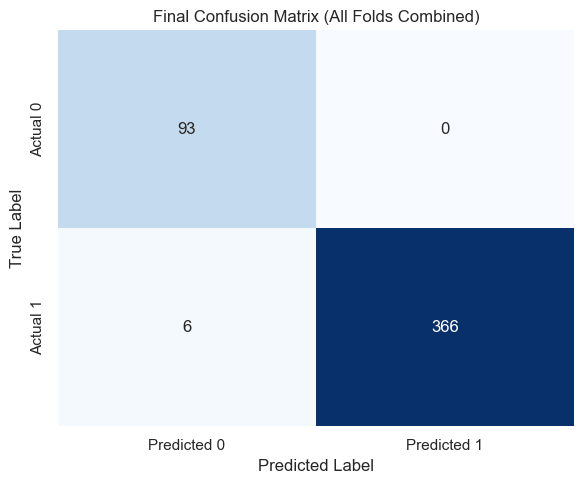

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Lists to store fold results
accuracies = []
all_true = []
all_preds = []

#  Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Predict probabilities
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Combine probabilities
    final_prob = log_prob * svm_prob * rf_prob
    final_prediction = np.argmax(final_prob, axis=1)

    # Store metrics
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    # Collect all predictions and actual labels
    all_preds.extend(final_prediction)
    all_true.extend(y_test)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Final Metrics
final_accuracy = np.mean(accuracies)
final_conf_matrix = confusion_matrix(all_true, all_preds)
precision = precision_score(all_true, all_preds)
recall = recall_score(all_true, all_preds)
f1 = f1_score(all_true, all_preds)

#  Print Overall Results
print(f"\nFinal 5-Fold Accuracy: {final_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix:\n", final_conf_matrix)

#  Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Final Confusion Matrix (All Folds Combined)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
